In [22]:
import numpy as np
import pandas as pd

# Input data
counts = np.array([30, 50, 70])
initial_readings = np.array([1.00, 1.00, 1.00])  # in mm
final_readings = np.array([1.19, 1.32, 1.44])    # in mm

theoretical_wavelength = 632.8  # in nm
uncertainty_position = 0.01      # in mm

def calculate_data(counts, initial_readings, final_readings, theoretical_wavelength, uncertainty_position):
    # Calculate actual position change in micrometers (um)
    delta_d = ((final_readings - initial_readings) * 1000) / 20  # Convert mm to um and divide by 20

    # Uncertainty in delta_d (same as uncertainty in position, converted to um)
    uncertainty_delta_d = np.sqrt(2 * ((uncertainty_position * 1000) / 20)**2)

    # Calculate experimental wavelength (in nm)
    lambda_e = 2 * delta_d / counts * 1000

    # Uncertainty in wavelength (propagated)
    uncertainty_lambda = lambda_e * (uncertainty_delta_d / delta_d)

    # Relative uncertainty in percentage
    relative_uncertainty = (uncertainty_lambda / lambda_e) * 100

    # Percentage discrepancy
    percentage_discrepancy = np.abs(lambda_e - theoretical_wavelength) / theoretical_wavelength * 100

    # Mean wavelength and mean percentage discrepancy
    mean_wavelength = np.mean(lambda_e)
    mean_percentage_discrepancy = percentage_discrepancy = np.abs(mean_wavelength - theoretical_wavelength) / theoretical_wavelength * 100

    # Prepare data for table
    data = {
        "Count (N)": counts,
        "Initial Position (mm)": initial_readings,
        "Final Position (mm)": final_readings,
        "Actual Position Change (Δd, um)": delta_d,
        "Uncertainty in Δd (um)": uncertainty_delta_d,
        "Experimental Wavelength (λ_e, nm)": lambda_e,
        "Uncertainty in λ_e (nm)": uncertainty_lambda,
        "Relative Uncertainty (%)": relative_uncertainty,
        "Theoretical Wavelength (λ_0, nm)": [theoretical_wavelength] * len(counts),
        "Percentage Discrepancy (%)": percentage_discrepancy
    }

    return pd.DataFrame(data), mean_wavelength, mean_percentage_discrepancy

# Generate the table and calculations
data_table, mean_wavelength, mean_percentage_discrepancy = calculate_data(
    counts, initial_readings, final_readings, theoretical_wavelength, uncertainty_position
)

# Display the rounded table
data_table_rounded = data_table.round(2)

# Save or print the table
data_table_rounded.to_csv("experimental_data_table.csv", index=False)  # Save as CSV
print(data_table_rounded)  # Print the table

# Print the results
print("Mean Experimental Wavelength (nm):", round(mean_wavelength, 2))
print("Percentage Discrepancy (%):", round(mean_percentage_discrepancy, 2))


   Count (N)  Initial Position (mm)  Final Position (mm)  \
0         30                    1.0                 1.19   
1         50                    1.0                 1.32   
2         70                    1.0                 1.44   

   Actual Position Change (Δd, um)  Uncertainty in Δd (um)  \
0                              9.5                    0.71   
1                             16.0                    0.71   
2                             22.0                    0.71   

   Experimental Wavelength (λ_e, nm)  Uncertainty in λ_e (nm)  \
0                             633.33                    47.14   
1                             640.00                    28.28   
2                             628.57                    20.20   

   Relative Uncertainty (%)  Theoretical Wavelength (λ_0, nm)  \
0                      7.44                             632.8   
1                      4.42                             632.8   
2                      3.21                           

# Calculated K

In [12]:
import pandas as pd
import numpy as np

# Input data
data = {
    "M4 Position (cm)": [7.6, 9.3, 10.0, 11.4, 11.7, 12.0],
    "M3 Position (cm)": [12.5, 12.5, 12.5, 12.5, 12.5, 12.5],
    "Maximum Intensity (Imax ± 0.001 V)": [0.360, 0.356, 0.370, 0.348, 0.360, 0.325],
    "Minimum Intensity (Imin ± 0.001 V)": [0.350, 0.331, 0.352, 0.308, 0.304, 0.260]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Calculate optical path difference (ΔL)
df["Optical Path Difference (ΔL, cm)"] = (df["M3 Position (cm)"] - df["M4 Position (cm)"]) * 2

# Define uncertainties
Imax_error = 0.001  # Error in Imax
Imin_error = 0.001  # Error in Imin

# Calculate Contrast Function (K)
df["Contrast Function (K)"] = (
    (df["Maximum Intensity (Imax ± 0.001 V)"] - df["Minimum Intensity (Imin ± 0.001 V)"]) /
    (df["Maximum Intensity (Imax ± 0.001 V)"] + df["Minimum Intensity (Imin ± 0.001 V)"])
)

# Calculate Uncertainty of K using error propagation
df["Uncertainty of K"] = df["Contrast Function (K)"] * np.sqrt(
    (Imax_error / df["Maximum Intensity (Imax ± 0.001 V)"])**2 +
    (Imin_error / df["Minimum Intensity (Imin ± 0.001 V)"])**2
)

# Display the combined DataFrame
df_rounded = df.round(4)  # Round results for better readability

# Display the DataFrame
print(df_rounded)


   M4 Position (cm)  M3 Position (cm)  Maximum Intensity (Imax ± 0.001 V)  \
0               7.6              12.5                               0.360   
1               9.3              12.5                               0.356   
2              10.0              12.5                               0.370   
3              11.4              12.5                               0.348   
4              11.7              12.5                               0.360   
5              12.0              12.5                               0.325   

   Minimum Intensity (Imin ± 0.001 V)  Optical Path Difference (ΔL, cm)  \
0                               0.350                               9.8   
1                               0.331                               6.4   
2                               0.352                               5.0   
3                               0.308                               2.2   
4                               0.304                               1.6   
5         

# Graph Plot


<>:57: SyntaxWarning: invalid escape sequence '\D'
<>:58: SyntaxWarning: invalid escape sequence '\D'
<>:57: SyntaxWarning: invalid escape sequence '\D'
<>:58: SyntaxWarning: invalid escape sequence '\D'
C:\Users\User\AppData\Local\Temp\ipykernel_6244\2193675728.py:57: SyntaxWarning: invalid escape sequence '\D'
  plt.title("Measured and Theoretical Contrast Function ($K$) vs Optical Path Difference ($\Delta L$)", fontsize=14)
C:\Users\User\AppData\Local\Temp\ipykernel_6244\2193675728.py:58: SyntaxWarning: invalid escape sequence '\D'
  plt.xlabel("Optical Path Difference ($\Delta L$, cm)", fontsize=12)


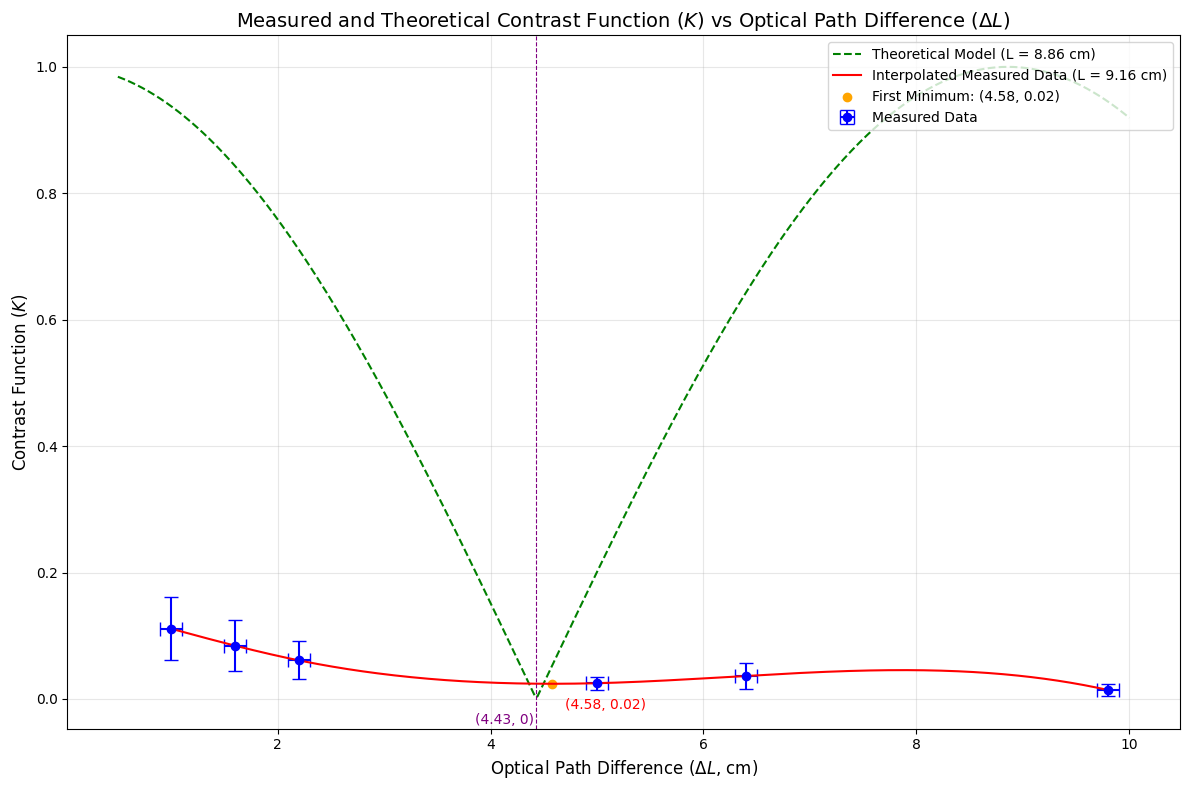

First X-Intercept (Theoretical): (4.43, 0)
First Minimum Point (Measured): (4.58, 0.02)


In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d
from scipy.signal import argrelextrema

# Data
delta_L = np.array([1.0, 1.6, 2.2, 5.0, 6.4, 9.8])  # Optical path difference (d, cm)
K = np.array([11.11, 8.43, 6.10, 2.49, 3.64, 1.41]) / 100  # Contrast Function (K), scaled to proper range
K_error = np.array([0.05, 0.04, 0.03, 0.01, 0.02, 0.01])  # Uncertainty of K
delta_L_error = np.full_like(delta_L, 0.1)  # Error in optical path difference (0.1 cm)

# Theoretical coherence length
L_theoretical = np.mean(np.pi * delta_L / np.arccos(K))  # Approximate L from the given data

# Generate delta_L values for the theoretical curve
delta_L_theoretical = np.linspace(0.5, 10, 500)  # Fine-grained d values for the curve
K_theoretical = np.abs(np.cos(np.pi * delta_L_theoretical / L_theoretical))  # Calculate theoretical K

# Interpolation of measured data for smooth curve
interp_function = interp1d(delta_L, K, kind='cubic')  # Cubic interpolation
delta_L_smooth = np.linspace(min(delta_L), max(delta_L), 500)  # Smooth d values
K_smooth = interp_function(delta_L_smooth)  # Interpolated K values

# Find the first x-intercept for the theoretical model
x_intercepts = [(2 * n + 1) * L_theoretical / 2 for n in range(int(max(delta_L_theoretical) / (L_theoretical / 2)))]
first_x_intercept = x_intercepts[0]

# Find the local minima in the interpolated curve
min_indices = argrelextrema(K_smooth, np.less)[0]
first_min_index = min_indices[0]
first_min_delta_L = delta_L_smooth[first_min_index]
first_min_K = K_smooth[first_min_index]
L_coherence = 2*first_min_delta_L

# Plotting
plt.figure(figsize=(12, 8))

# Measured data with horizontal and vertical error bars
plt.errorbar(delta_L, K, xerr=delta_L_error, yerr=K_error, fmt='o', color='blue', capsize=5, label='Measured Data')

# Theoretical model
plt.plot(delta_L_theoretical, K_theoretical, color='green', linestyle='--', label=f'Theoretical Model (L = {L_theoretical:.2f} cm)')

# Interpolated measured data
plt.plot(delta_L_smooth, K_smooth, color='red', linestyle='-', label=f'Interpolated Measured Data (L = {L_coherence:.2f} cm)')

# Highlight the first x-intercept for the theoretical model
plt.axvline(first_x_intercept, color='purple', linestyle='--', linewidth=0.8)
plt.text(first_x_intercept - 0.3, -0.04, f'({first_x_intercept:.2f}, 0)', color='purple', fontsize=10, ha='center')

# Highlight the first minimum point and label its coordinates
plt.scatter(first_min_delta_L, first_min_K, color='orange', label=f'First Minimum: ({first_min_delta_L:.2f}, {first_min_K:.2f})')
plt.text(first_min_delta_L + 0.5, first_min_K - 0.04, f'({first_min_delta_L:.2f}, {first_min_K:.2f})', 
         color='red', fontsize=10, ha='center')

# Labels, title, and legend
plt.title("Measured and Theoretical Contrast Function ($K$) vs Optical Path Difference ($\Delta L$)", fontsize=14)
plt.xlabel("Optical Path Difference ($\Delta L$, cm)", fontsize=12)
plt.ylabel("Contrast Function ($K$)", fontsize=12)
plt.grid(alpha=0.3)
plt.legend(fontsize=10, loc='upper right')
plt.tight_layout()

# Show plot
plt.show()

# Print results for verification
print(f"First X-Intercept (Theoretical): ({first_x_intercept:.2f}, 0)")
print(f"First Minimum Point (Measured): ({first_min_delta_L:.2f}, {first_min_K:.2f})")


Percentage difference 

In [38]:
def calculate_percentage_difference(value1, value2):
    """
    Calculate the percentage difference between two values.

    Parameters:
    value1 (float): The first value (e.g., theoretical coherence length).
    value2 (float): The second value (e.g., measured coherence length).

    Returns:
    float: The percentage difference between the two values.
    """
    # Calculate percentage difference based on the formula
    percentage_difference = 100 * abs(value1 - value2) / ((value1 + value2) / 2)
    return percentage_difference

# Values from the provided image
theoretical_length = 8.86  # Theoretical coherence length in cm
measured_length = 9.16     # Measured coherence length in cm

# Calculate the percentage difference
result = calculate_percentage_difference(theoretical_length, measured_length)

# Display the result
print(f"The percentage difference is {result:.2f}%.")




The percentage difference is 3.33%.
